# Keras tutorial - Emotion Detection in Images of Faces

* Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. 
* Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. 
* Being able to go from idea to result with the least possible delay is key to finding good models. 
* However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that you would still implement in TensorFlow rather than in Keras. 
* That being said, Keras will work fine for many common models. 

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


## 1 - Emotion Tracking

* Train your model to detect if someone's emotion is classified as "happy" or "not happy."

Run the following code to normalize the dataset and learn about its shapes.

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Face" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

In [7]:

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    

    Returns:
    model -- a Model() instance in Keras
    """
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    HappyModel = Model(inputs = X_input, outputs = X, name='HappyModel')

    
    return HappyModel

In [8]:
happyModel = HappyModel(X_train.shape[1:])


In [9]:
happyModel.compile(optimizer = "adam", loss="binary_crossentropy", metrics = ["accuracy"])


In [10]:
happyModel.fit(x = X_train, y = Y_train, epochs = 5, batch_size = 16)

Epoch 1/5
600/600 [==============================] - 7s 12ms/step - loss: 1.0521 - accuracy: 0.7183
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.2074 - accuracy: 0.9100
Epoch 3/5
600/600 [==============================] - 6s 11ms/step - loss: 0.1449 - accuracy: 0.9483
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.1329 - accuracy: 0.9567
Epoch 5/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0876 - accuracy: 0.9717


In [11]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 4ms/step

Loss = 0.27595678170522053
Test Accuracy = 0.8866666555404663


#### Tips for improving your model

If you have not yet achieved a very good accuracy (>= 80%), here are some things tips:

- Use blocks of CONV->BATCHNORM->RELU such as:
```python
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)
```
until your height and width dimensions are quite low and your number of channels quite large (≈32 for example).  
You can then flatten the volume and use a fully-connected layer.
- Use MAXPOOL after such blocks.  It will help you lower the dimension in height and width.
- Change your optimizer. We find 'adam' works well. 
- If you get memory issues, lower your batch_size (e.g. 12 )
- Run more epochs until you see the train accuracy no longer improves. 

**Note**: If you perform hyperparameter tuning on your model, the test set actually becomes a dev set, and your model might end up overfitting to the test (dev) set. Normally, you'll want separate dev and test sets.  The dev set is used for parameter tuning, and the test set is used once to estimate the model's performance in production.

## Key Points to remember
- Keras is a tool we recommend for rapid prototyping. It allows you to quickly try out different model architectures.
- Remember The four steps in Keras: 


1. Create  
2. Compile  
3. Fit/Train  
4. Evaluate/Test  

## 4 - Test with your own image

The training/test sets were quite similar; for example, all the pictures were taken against the same background (since a front door camera is always mounted in the same position). This makes the problem easier, but a model trained on this data may or may not work on your own data. But feel free to give it a try!

Result = 0
Model predicts you are not smiling


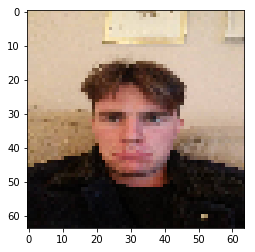

In [55]:
### START CODE HERE ###
img_path = 'images/frown.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# print("Result = ", happyModel.predict(x))
if happyModel.predict(x) == 1:
    print("Result = 1")
    print("Model predicts you are smiling")
else:
    print("Result = 0")
    print("Model predicts you are not smiling")



## 5 - Other useful functions in Keras

Two other basic features of Keras that you'll find useful are:
- `model.summary()`: prints the details of your layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;). It is saved in "File" then "Open..." in the upper bar of the notebook.

Run the following code.

In [12]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0

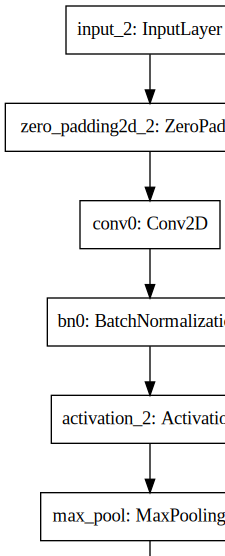

In [13]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))